In [21]:
from jax import numpy as jnp
import matplotlib.pyplot as plt
import math

In [24]:
def number_regions(Di, D):
    N = 0
    for i in range(0,Di+1):
        N += math.comb(D, i)
    return N


In [25]:
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")


Di=2, D=3, Number of regions = 7, True value = 7


In [26]:
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 13432735556, True value = 13432735556


In [27]:
try:
    N = number_regions(10, 8)
    print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)


Di=10, D=8, Number of regions = 256, True value = 256


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


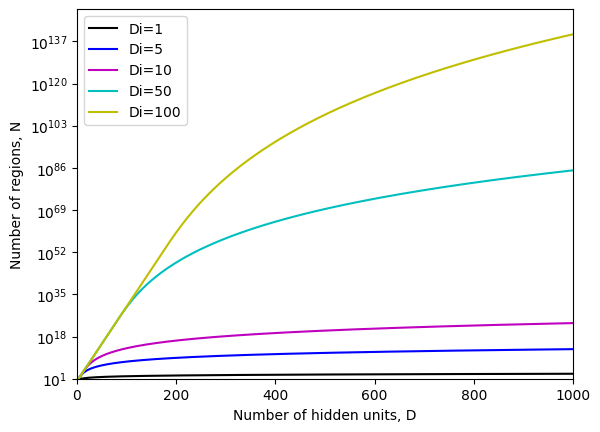

In [39]:
import numpy as np
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0, :], 'k-')
ax.semilogy(regions[1, :], 'b-')
ax.semilogy(regions[2, :], 'm-')
ax.semilogy(regions[3, :], 'c-')
ax.semilogy(regions[4, :], 'y-')
ax.legend(['Di=1', 'Di=5', 'Di=10', 'Di=50', 'Di=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0, 1000])
plt.ylim([1e1, 1e150])
plt.show()

In [ ]:
def number_parameters(D_i, D):

In [40]:
import jax
import jax.numpy as jnp
from jax import vmap
import jax.scipy.special
import matplotlib.pyplot as plt

def number_regions(m, D):
    # Compute sum_{k=0}^m (D choose k)
    ks = jnp.arange(m + 1)
    comb_fn = lambda k: jax.scipy.special.comb(D, k)
    return jnp.sum(vmap(comb_fn)(ks))

# Create dimensions and hidden unit counts
dims = jnp.array([1, 5, 10, 50, 100])
D_values = jnp.arange(1000)

# Vectorized computation of regions
def compute_row(D_i):
    min_dims = jnp.minimum(D_i, D_values)
    return vmap(number_regions)(min_dims, D_values)

regions = jnp.stack([compute_row(D_i) for D_i in dims])

# Convert JAX array to NumPy for plotting
regions_np = jax.device_get(regions)

# Create plot
fig, ax = plt.subplots()
ax.semilogy(regions_np[0], 'k-', label='D=1')
ax.semilogy(regions_np[1], 'b-', label='D=5')
ax.semilogy(regions_np[2], 'm-', label='D=10')
ax.semilogy(regions_np[3], 'c-', label='D=50')
ax.semilogy(regions_np[4], 'y-', label='D=100')
ax.legend()
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0, 1000])
plt.ylim([1e1, 1e150])
plt.show()

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[]
It arose in the jnp.arange argument 'stop'
This BatchTracer with object id 5778525168 was created on line:
  /var/folders/kx/kwzs_5p933b6h50__7gh_t7w0000gn/T/ipykernel_58731/3342823369.py:9:20 (number_regions)

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError